In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.head()

,MMV,Make,Model,Variant,Type,Fuel Type,Age,Transmission,Color,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,HyundaiI10Sportz 1.2,Hyundai,I10,Sportz 1.2,Hatchback,Petrol,3,Manual,White,"12,000",1,8.5,8.8,537850,338352,37.1
1,HyundaiI20Magna (O) 1.2,Hyundai,I20,Magna (O) 1.2,Hatchback,Petrol,9,Manual,Beige,"68,000",1,5.0,7.3,613863,189200,69.2
2,HyundaiI20Sportz 1.2,Hyundai,I20,Sportz 1.2,Hatchback,Petrol,8,Manual,White,"31,143",1,6.2,4.6,678359,347568,48.8
3,HyundaiNeo Fluidic Elantra1.6SxAtCrdi,Hyundai,Neo Fluidic Elantra,1.6SxAtCrdi,Sedan,Diesel,2,Automatic,Silver,"6,000",1,8.5,7.9,2228480,1629250,26.9
4,HyundaiSantro XingXo,Hyundai,Santro Xing,Xo,Hatchback,Petrol,11,Manual,Golden,"100,000",2,4.3,9.9,453719,86240,81.0


In [3]:
irrelevant = ["MMV", "Model", "Variant", "Color"] 
df = df.drop(irrelevant, axis=1)

In [4]:
# convert Kms to int
df["Kms"] = df["Kms"].apply(lambda x: int(x.replace(",", "")))

In [5]:
df.head()

,Make,Type,Fuel Type,Age,Transmission,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
0,Hyundai,Hatchback,Petrol,3,Manual,12000,1,8.5,8.8,537850,338352,37.1
1,Hyundai,Hatchback,Petrol,9,Manual,68000,1,5.0,7.3,613863,189200,69.2
2,Hyundai,Hatchback,Petrol,8,Manual,31143,1,6.2,4.6,678359,347568,48.8
3,Hyundai,Sedan,Diesel,2,Automatic,6000,1,8.5,7.9,2228480,1629250,26.9
4,Hyundai,Hatchback,Petrol,11,Manual,100000,2,4.3,9.9,453719,86240,81.0


In [17]:
df["Transmission"].unique()

array(['Manual', 'Automatic', 'Automated Manual Transmission'],
      dtype=object)

In [18]:
df[df["Transmission"] == "Automated Manual Transmission"]

,Make,Type,Fuel Type,Age,Transmission,Kms,No of Owner,Heath score,price score,on road price,Current Price,Dep
88,Maruti Suzuki,Hatchback,Petrol,1,Automated Manual Transmission,4849,1,9.2,8.6,558445,445302,20.3
246,Maruti Suzuki,Hatchback,Petrol,4,Automated Manual Transmission,15900,1,9.9,5.7,586090,366974,37.4
1785,Maruti Suzuki,Hatchback,Petrol,2,Automated Manual Transmission,17000,1,8.8,6.6,634730,426550,32.8
1854,Maruti Suzuki,Hatchback,Petrol,3,Automated Manual Transmission,12000,1,8.5,6.6,586090,372624,36.4
1980,Maruti Suzuki,Hatchback,Petrol,2,Automated Manual Transmission,42000,1,8.0,6.0,605433,403200,33.4
2143,Maruti Suzuki,Hatchback,Petrol,2,Automated Manual Transmission,27460,1,4.6,7.7,615206,421872,31.4
2773,Maruti Suzuki,Hatchback,Petrol,4,Automated Manual Transmission,41273,1,4.8,5.8,586090,370678,36.8
3662,Maruti Suzuki,Hatchback,Petrol,4,Automated Manual Transmission,30000,1,5.0,6.8,586090,319968,45.4
3758,Maruti Suzuki,Hatchback,Petrol,4,Automated Manual Transmission,12000,1,9.9,5.7,586090,375312,36.0
3800,Maruti Suzuki,Hatchback,Petrol,2,Automated Manual Transmission,14960,1,5.0,9.4,611251,417198,31.7


In [6]:
df_one_hot = pd.get_dummies(df)

In [7]:
df_one_hot.columns

Index(['Age', 'Kms', 'No of Owner', 'Heath score', 'price score',
       'on road price', 'Current Price', 'Dep', 'Make_Honda', 'Make_Hyundai',
       'Make_Maruti Suzuki', 'Make_Toyota', 'Type_Crossover', 'Type_Hatchback',
       'Type_MUV', 'Type_SUV', 'Type_Sedan', 'Type_Van', 'Fuel Type_CNG',
       'Fuel Type_Diesel', 'Fuel Type_LPG', 'Fuel Type_Petrol',
       'Fuel Type_Petrol + CNG', 'Fuel Type_Petrol + LPG', 'Fuel Type_cng',
       'Fuel Type_diesel', 'Transmission_Automated Manual Transmission',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

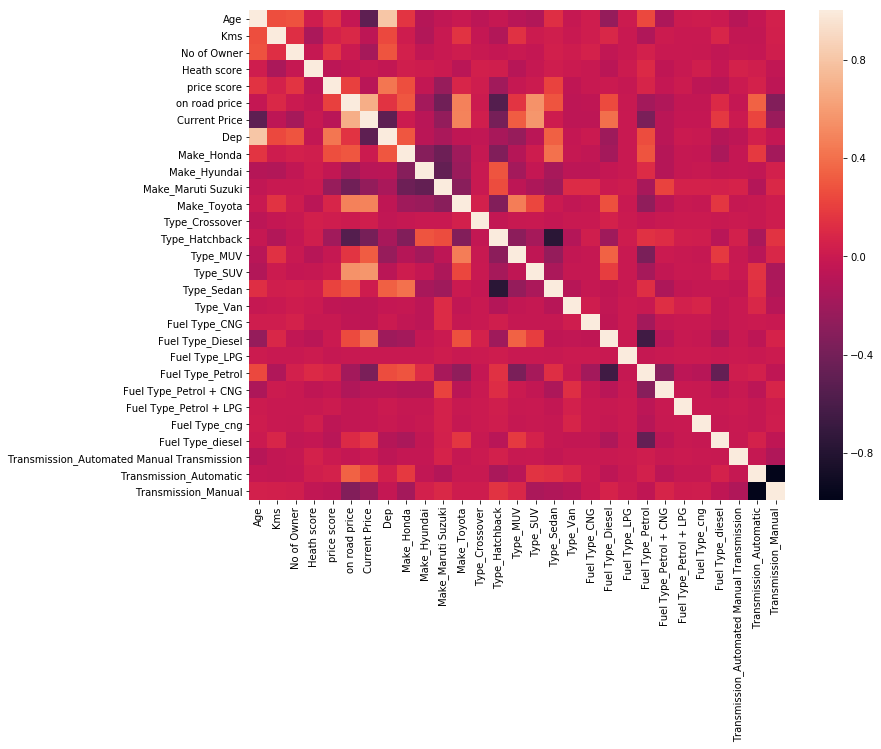

In [10]:
corr_mat = df_one_hot.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat)

In [13]:
df_one_hot.isnull().sum()

Age                                           0
Kms                                           0
No of Owner                                   0
Heath score                                   0
price score                                   0
on road price                                 0
Current Price                                 0
Dep                                           0
Make_Honda                                    0
Make_Hyundai                                  0
Make_Maruti Suzuki                            0
Make_Toyota                                   0
Type_Crossover                                0
Type_Hatchback                                0
Type_MUV                                      0
Type_SUV                                      0
Type_Sedan                                    0
Type_Van                                      0
Fuel Type_CNG                                 0
Fuel Type_Diesel                              0
Fuel Type_LPG                           

In [14]:
len(df)

3879